# Capstone 1 EDA
## Predicting Prediabetes with Machine Learning
## NHANES Data 2007-2016

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Load data

dtype_dict = {'SEQN': int}
demo_dtype_dict = {"SEQN": int, "SDDSRVYR": int, "RIDSTATR": int, "RIAGENDR": int, "RIDAGEYR": int, 
                   "RIDRETH1": int, "DMDHHSIZ": int, "DMDFMSIZ": int, 
                   "DMDHRGND": int, "DMDHRAGE": int, "SDMVPSU": int, "SDMVSTRA": int}
ques_dtype_dict = {"SEQN": int, "SMDUPCA": object, "SMD100BR": object}

demo = pd.read_csv('data/demo_all.csv', dtype=demo_dtype_dict)
diet = pd.read_csv('data/diet_all.csv', dtype=dtype_dict)
exam = pd.read_csv('data/exam_all.csv', dtype=dtype_dict)
labs = pd.read_csv('data/labs_all.csv', dtype=dtype_dict)
meds = pd.read_csv('data/meds_all.csv', dtype=dtype_dict)
ques = pd.read_csv('data/questionnaire_all.csv', dtype=ques_dtype_dict)

In [3]:
demo.shape

(50588, 37)

In [4]:
diet.shape

(47156, 162)

In [5]:
exam.shape

(48710, 39)

In [6]:
labs.shape

(46685, 210)

In [7]:
meds.shape

(99966, 13)

In [8]:
ques.shape

(50588, 428)

### How many survey participants are there?

In [9]:
total_participants = demo.SEQN.count()
total_participants

50588

### How many participants have lab test results?

In [10]:
total_labs = labs.SEQN.count()
total_labs

46685

## Let's look at the three labs used to diagnose diabetes and prediabetes. 
### How many participants have one or more of the diagnostic labs for prediabetes/diabetes?

In [11]:
diagnostics = labs.loc[:, ['SEQN', 'LBXGLU', 'LBXGH', 'LBXGLT']]
diagnostics.dropna(how='all', inplace=True)
all_3_labs = labs[labs.LBXGLU.notnull() & labs.LBXGH.notnull() & labs.LBXGLT.notnull()]['SEQN'].count()
any_3_labs = labs[labs.LBXGLU.notnull() | labs.LBXGH.notnull() | labs.LBXGLT.notnull()]['SEQN'].count()
diagnostics.LBXGLU.count(), diagnostics.LBXGH.count(), diagnostics.LBXGLT.count(), any_3_labs, all_3_labs

(15673, 32471, 11523, 32502, 11502)

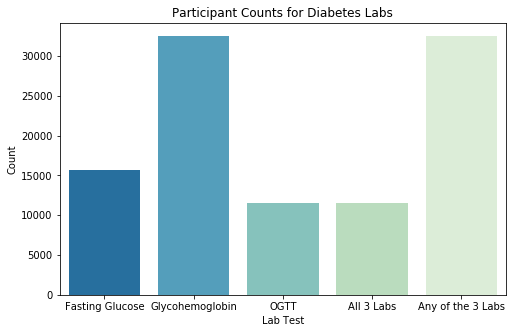

In [12]:
plt.figure(figsize=(8, 5))
labels = ['Fasting Glucose', 'Glycohemoglobin', 'OGTT', 'All 3 Labs', 'Any of the 3 Labs']
plotlabs = (diagnostics.LBXGLU.count(), diagnostics.LBXGH.count(), diagnostics.LBXGLT.count(), all_3_labs, any_3_labs)
ax = sns.barplot(x=labels, y=plotlabs, palette='GnBu_r')
ax.set_title('Participant Counts for Diabetes Labs')
ax.set_xlabel('Lab Test')
ax.set_ylabel('Count')
plt.tight_layout
plt.show()

### What fraction of all participants with labs have diagnostic labs for prediabetes/diabetes?


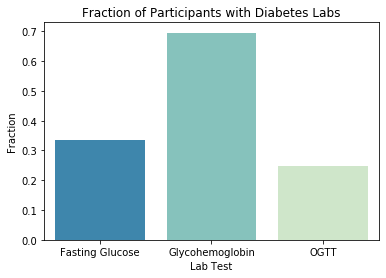

In [13]:
frac_GLU = diagnostics.LBXGLU.count() / total_labs
frac_GH = diagnostics.LBXGH.count() / total_labs
frac_GLT = diagnostics.LBXGLT.count() / total_labs

labels = ['Fasting Glucose', 'Glycohemoglobin', 'OGTT']
plotlabs = (frac_GLU, frac_GH, frac_GLT)
ax = sns.barplot(x=labels, y=plotlabs, palette='GnBu_r')
ax.set_title('Fraction of Participants with Diabetes Labs')
ax.set_xlabel('Lab Test')
ax.set_ylabel('Fraction')
plt.tight_layout
plt.show()

### What fraction of participants with Glycohemoglobin lab have Fasting Glucose or OGTT labs?

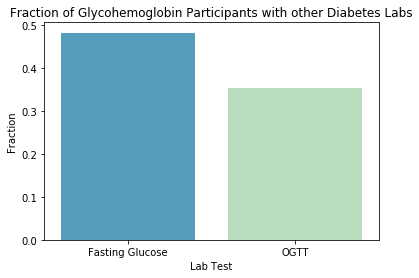

In [14]:
frac_GLU_GH = diagnostics.LBXGLU.count() / diagnostics.LBXGH.count()
frac_GLT_GH = diagnostics.LBXGLT.count() / diagnostics.LBXGH.count()

labels = ['Fasting Glucose', 'OGTT']
plotlabs = (frac_GLU_GH, frac_GLT_GH)
ax = sns.barplot(x=labels, y=plotlabs, palette='GnBu_r')
ax.set_title('Fraction of Glycohemoglobin Participants with other Diabetes Labs')
ax.set_xlabel('Lab Test')
ax.set_ylabel('Fraction')
plt.tight_layout
plt.show()

### Look at basic statistics for the three diagnostic labs. 

In [15]:
round(diagnostics[['LBXGLU', 'LBXGH', 'LBXGLT']].describe(), 2)

,LBXGLU,LBXGH,LBXGLT
count,15673.00,32471.00,11523.00
mean,107.13,5.68,117.44
std,34.71,1.03,49.73
min,21.00,2.00,23.00
25%,92.00,5.20,87.00
50%,99.00,5.50,106.00
75%,108.00,5.80,133.00
max,584.00,17.80,604.00


### What are the distributions of the diagnostic lab values?

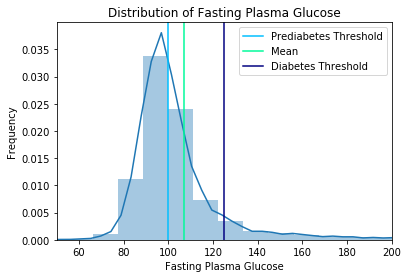

In [16]:
fig, ax=plt.subplots()
sns.distplot(labs[labs.LBXGLU.notnull()]['LBXGLU'], ax=ax)
ax.set_xlim(50, 200)
ax.grid(False)
ax.set_title('Distribution of Fasting Plasma Glucose')
plt.axvline(100, color='deepskyblue', label='Prediabetes Threshold')
plt.axvline(labs.LBXGLU.mean(), color='mediumspringgreen', label='Mean')
plt.axvline(125, color='navy', label='Diabetes Threshold')
plt.xlabel('Fasting Plasma Glucose')
plt.ylabel('Frequency')
ax.legend(loc='upper right')
plt.show()

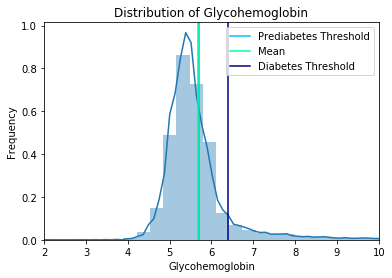

In [17]:
fig, ax=plt.subplots()
sns.distplot(labs[labs.LBXGH.notnull()]['LBXGH'], ax=ax)
ax.set_xlim(2, 10)
ax.grid(False)
ax.set_title('Distribution of Glycohemoglobin')
plt.axvline(5.7, color='deepskyblue', label='Prediabetes Threshold')
plt.axvline(labs.LBXGH.mean(), color='mediumspringgreen', label='Mean')
plt.axvline(6.4, color='navy', label='Diabetes Threshold')
plt.xlabel('Glycohemoglobin')
plt.ylabel('Frequency')
ax.legend(loc='upper right')
plt.show()

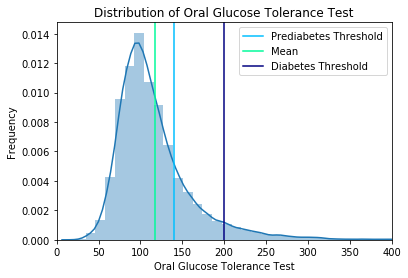

In [18]:
fig, ax=plt.subplots()
sns.distplot(labs[labs.LBXGLT.notnull()]['LBXGLT'], ax=ax)
ax.set_xlim(0, 400)
ax.grid(False)
ax.set_title('Distribution of Oral Glucose Tolerance Test')
plt.axvline(140, color='deepskyblue', label='Prediabetes Threshold')
plt.axvline(labs.LBXGLT.mean(), color='mediumspringgreen', label='Mean')
plt.axvline(200, color='navy', label='Diabetes Threshold')
plt.xlabel('Oral Glucose Tolerance Test')
plt.ylabel('Frequency')
ax.legend(loc='upper right')
plt.show()

### What are the relationships between the diagnostic lab values?

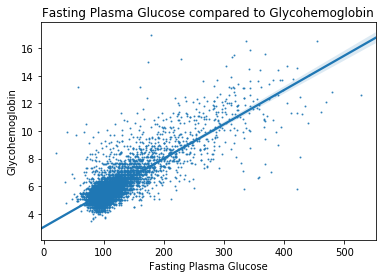

In [19]:
ax = sns.regplot(x="LBXGLU", y="LBXGH", fit_reg=True, data=diagnostics,scatter_kws={'s':1})
ax.set_title('Fasting Plasma Glucose compared to Glycohemoglobin')
plt.xlabel('Fasting Plasma Glucose')
plt.ylabel('Glycohemoglobin')
plt.show()

__High correlation here makes sense as Glycohemoglobin is 3 month average of fasting plasma glucose.__

In [20]:
diagstat = diagnostics.dropna(how='any')
r, p = stats.pearsonr(diagstat.LBXGLU, diagstat.LBXGH)
r, p

(0.7309436977864919, 0.0)

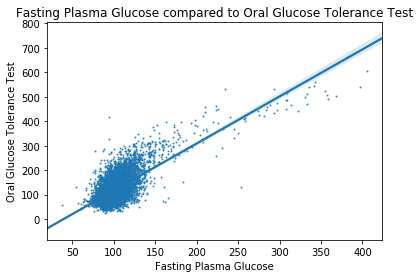

In [21]:
ax = sns.regplot(x="LBXGLU", y="LBXGLT", fit_reg=True, data=diagnostics,scatter_kws={'s':1})
ax.set_title('Fasting Plasma Glucose compared to Oral Glucose Tolerance Test')
plt.xlabel('Fasting Plasma Glucose')
plt.ylabel('Oral Glucose Tolerance Test')
plt.show()

In [22]:
diagstat = diagnostics.dropna(how='any')
r, p = stats.pearsonr(diagstat.LBXGLU, diagstat.LBXGLT)
r, p

(0.6917836909325721, 0.0)

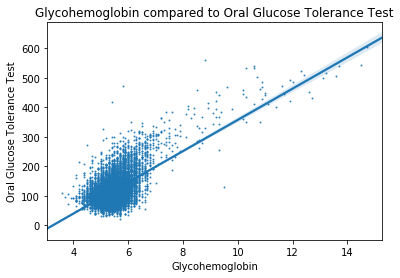

In [23]:
ax = sns.regplot(x="LBXGH", y="LBXGLT", fit_reg=True, data=diagnostics,scatter_kws={'s':1})
ax.set_title('Glycohemoglobin compared to Oral Glucose Tolerance Test')
plt.xlabel('Glycohemoglobin')
plt.ylabel('Oral Glucose Tolerance Test')
plt.show()

__Correlation is lowest here among relationships between diagnostic tests.__

In [24]:
diagstat = diagnostics.dropna(how='any')
r, p = stats.pearsonr(diagstat.LBXGH, diagstat.LBXGLT)
r, p

(0.6208188514955162, 0.0)

### Is there a correlation between age and glycohemoglobin?  
Glycohemoglobin clearly trends up with age. 

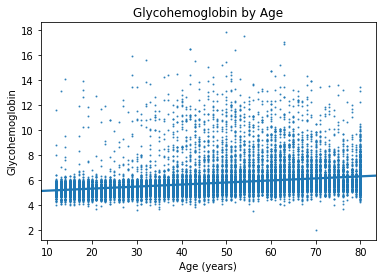

In [25]:
labs_age = labs.merge(demo, how='outer', on='SEQN')
ax = sns.regplot(x="RIDAGEYR", y="LBXGH", fit_reg=True, data=labs_age,scatter_kws={'s':1});
ax.set_title('Glycohemoglobin by Age')
plt.xlabel('Age (years)')
plt.ylabel('Glycohemoglobin')
plt.show()

## How many people meet the criteria for prediabetes or diabetes by one or more labs?

__Create a column for diagnostic indicator.  Use Americal Diabetes Association criteria.__ 
> 0 = no diabetes,   
1 = prediabetes,  
2 = diabetes

In [26]:
def set_diab(row):
    """
    Return integer indicator for diabetes diagnosis criteria or NaN if no test results found.
        2 = Diabetes
        1 = Prediabetes
        0 = No Diabetes
        NaN = No test results found
        
    Input: row from labs table including three diagnostics tests for diabetes: 
               LBXGH: Fasting Plasma Glucose, 
               LBXGLU: Glycohemoglobin (HbA1c),
               LBXGLT: Oral Glucose Tolerance Test
    """
    if (np.isnan(row['LBXGH']) and np.isnan(row['LBXGLU']) and np.isnan(row['LBXGLT'])):
        return np.NaN
    # Use American Diabetes Association's diagnosis criteria. 
    if (row['LBXGH'] >= 6.5) or (row['LBXGLU'] >= 126) or (row['LBXGLT'] >= 200):
        return 2
    elif (row['LBXGH'] >= 5.7 or row['LBXGLU'] >= 100 or row['LBXGLT'] >= 140):
        return 1
    else:
        return 0


labs = labs.assign(DIAB=labs.apply(set_diab, axis=1))
labs.DIAB.value_counts()

0.0    17476
1.0    10939
2.0     4087
Name: DIAB, dtype: int64

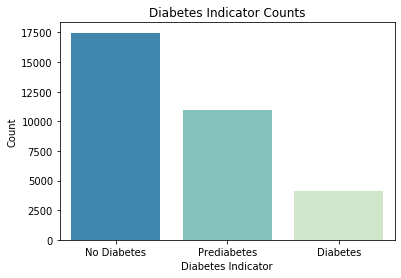

In [27]:
ax = sns.countplot(x='DIAB', data=labs, palette='GnBu_r')
ax.set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'])
ax.set_title('Diabetes Indicator Counts')
ax.set_xlabel('Diabetes Indicator')
ax.set_ylabel('Count')
plt.show()

## Now take a look at the ICD-10 codes in the prescription data. 
### How many participants have ICD-10 codes? 
#### This means they are taking medication for a condition, and the condition was recorded via its ICD-10 code. 

In [28]:
tot_icd10_count = len(meds[meds.RXDRSC1.notnull() | meds.RXDRSC2.notnull() | meds.RXDRSC3.notnull()]['SEQN'].unique())
tot_icd10_count

7990

### How many participants have ICD-10 codes for Diabetes?

In [29]:
diab_icd10 = meds[(meds.RXDRSC1.str.contains('E11', na=False)) \
                       | (meds.RXDRSC2.str.contains('E11', na=False)) \
                       | (meds.RXDRSC3.str.contains('E11', na=False))]
diab_icd10_count = len(diab_icd10['SEQN'].unique())
diab_icd10_count

1260

### What fraction of participants who meet diagnostic criteria for Diabetes have ICD-10 codes for Diabetes?  
__Note: We would not expect this to be 1.0 as the American Diabetes Association states 24% of American adults with diabetes  are undiagnosed.  
Also Note: ICD codes are only available for two survey cycles, so calculate proportion based only on those cycles.__

In [30]:
labs_demo = labs.merge(demo, on='SEQN')
prop_icd_diab = diab_icd10_count / labs_demo[(labs_demo.DIAB == 2) & (labs_demo['SDDSRVYR'].isin([8,9]))]['DIAB'].count()
prop_icd_diab

0.7730061349693251

### How many participants have ICD-10 codes for Elevated Blood Sugar and not Diabetes?  
#### These would meet criteria for Prediabetes.

In [31]:
prediab_icd10 = meds[(meds.RXDRSC1.str.contains('R73', na=False)) \
                          | (meds.RXDRSC2.str.contains('R73', na=False)) \
                          | (meds.RXDRSC3.str.contains('R73', na=False))]
prediab_icd10 = prediab_icd10[~(prediab_icd10.RXDRSC1.str.contains('E11', na=False) \
                                | prediab_icd10.RXDRSC2.str.contains('E11', na=False) \
                                | prediab_icd10.RXDRSC3.str.contains('E11', na=False))]
prediab_icd10_count = len(prediab_icd10['SEQN'].unique())
prediab_icd10_count

206

### What fraction of participants who meet Prediabetes diagnostic criteria have ICD-10 codes for Prediabetes?  
__Note: We would expect this number to be low as these people are taking medication for Elevated Blood Sugar but have not yet been diagnosed with Diabetes, presumably as their blood sugar is not yet high enough. Prediabetes is usually treated with lifestyle changes, not medication.    
Also note: ICD codes are only available for two survey cycles, so calculate fraction based only on those cycles.__

In [32]:
prop_icd_prediab = prediab_icd10_count / labs_demo[(labs_demo.DIAB == 1) \
                                                   & (labs_demo['SDDSRVYR'].isin([8,9]))]['DIAB'].count()
prop_icd_prediab

0.047509225092250924

#### Categorize all participants with lab data by whether they have ICD-10 codes and therefore take medication for:
> Diabetes  
> Prediabetes (Elevated Blood Sugar)  
> No medication for Diabetes or Prediabetes  

In [33]:
diag_meds = diagnostics[['SEQN', 'LBXGLU', 'LBXGH', 'LBXGLT']]

In [34]:
def get_diab_icd(seqn):
    """
    Return integer indicator for diabetes ICD-10 codes.
        2 = Diabetes
        1 = Prediabetes
        0 = No Diabetes
        NaN = No ICD-10 codes
   
    Input: seqn 
    """
    
    # Lookup 
    icd_code_rows = meds.loc[meds['SEQN'] == seqn][['RXDRSC1', 'RXDRSC2', 'RXDRSC3']]
     
    # If no ICD-10 data for seqn, return NaN. 
    if len(icd_code_rows) == 0:
        return np.NaN
     
    # If ICD-10 data is all null, return NaN. 
    if (icd_code_rows.RXDRSC1.isnull().values.all()) and (icd_code_rows.RXDRSC2.isnull().values.all()) \
            and (icd_code_rows.RXDRSC3.isnull().values.all()):
        return np.NaN
  
    # E11 is base code for diabetes. Check for this first as some participants have codes for diabetes and 
    #    elevated blood sugar. These participants go in Diabetes Med category. 
    if (icd_code_rows['RXDRSC1'].str.contains('E11').any()) or (icd_code_rows['RXDRSC2'].str.contains('E11').any()) \
                 or (icd_code_rows['RXDRSC3'].str.contains('E11').any()):
        return 2
    # R73 is base code for Elevated Blood Sugar, which is Prediabetes in the absence of a Diabetes diagnosis. 
    elif (icd_code_rows['RXDRSC1'].str.contains('R73').any()) or (icd_code_rows['RXDRSC2'].str.contains('R73').any()) \
             or (icd_code_rows['RXDRSC3'].str.contains('R73').any()) :
        return 1
    else:
        return 0

In [35]:
# Create column for Diabetes Medication Code. 
diag_meds = diag_meds.assign(DIABICD = np.NaN)
for seqn in meds[meds.RXDRSC1.notnull() | meds.RXDRSC2.notnull() | meds.RXDRSC3.notnull()].SEQN.unique():
    diag_meds.at[diag_meds.SEQN == seqn, 'DIABICD'] = get_diab_icd(seqn)
diag_meds.DIABICD.value_counts()    

0.0    6241
2.0    1222
1.0     138
Name: DIABICD, dtype: int64

In [36]:
# How many non-null values did we get from get_diab_icd?
diag_meds.DIABICD.notnull().values.sum()

7601

In [37]:
# We are short 389 SEQN values - there were 7990 unique values of SEQN in meds but we only have 7601 total DIABICD values. 
seqn_list = meds[meds.RXDRSC1.notnull() | meds.RXDRSC2.notnull() | meds.RXDRSC3.notnull()].SEQN.unique()
diff_list = list(set(seqn_list) - set(diag_meds[diag_meds.DIABICD.notnull()].SEQN))
len(diff_list)

389

In [38]:
# Aha - Missing 389 SEQN values do not have any lab test results. Can't do anything with these. 
labs_test = labs.SEQN.isin(diff_list).sum()
labs_test

0

In [39]:
diag_meds['diagnostic_category'] = diag_meds['DIABICD'].apply(lambda value: 'No Diabetes Meds' if value == 0 
                                                               else 'Prediabetes Meds' if value == 1 
                                                               else 'Diabetes Meds' if value == 2
                                                               else np.NaN)
diag_meds['diagnostic_category'] = pd.Categorical(diag_meds['diagnostic_category'], 
                                             categories=['No Diabetes Meds', 'Prediabetes Meds', 'Diabetes Meds'])

### How do the diagnostic labs look for the groups: No Diabetes Meds, Prediabetes Meds, Diabetes Meds?

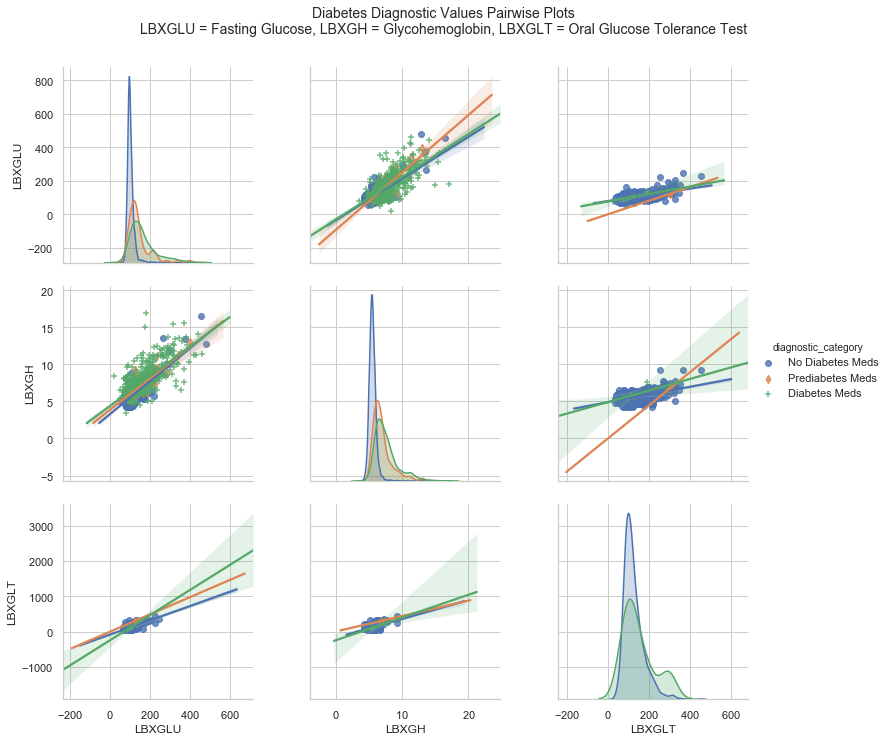

In [50]:
# Note: OGTT (LBXGLT) has very few data points, causes runtime warning during plot. 
pp = sns.pairplot(diag_meds, hue='diagnostic_category', kind='reg', vars=['LBXGLU', 'LBXGH', 'LBXGLT'], 
                  dropna=True,
                  height=3.5, aspect=3.5/3.5, 
                  markers=['o', 'd', '+'])

fig = pp.fig
fig.subplots_adjust(top=0.90, wspace=0.3)
t = fig.suptitle('Diabetes Diagnostic Values Pairwise Plots\n'+
                  'LBXGLU = Fasting Glucose, LBXGH = Glycohemoglobin, LBXGLT = Oral Glucose Tolerance Test', fontsize=14)

#### How many lab tests exist for each of the three med categories?
Not many LBXGLT for diabetes, prediabetes medication categories

In [53]:
diag_meds.groupby(['DIABICD'])[['LBXGLU', 'LBXGH', 'LBXGLT']].count()

,LBXGLU,LBXGH,LBXGLT
DIABICD,,,
0.0,2480,5189,1994
1.0,64,133,1
2.0,558,1176,6


## Let's look at some blood markers and exam results broken down by Diabetes Diagnosis Indicator: No Diabetes, Prediabetes, Diabetes

### How does triglycerides vary across the three groups? 

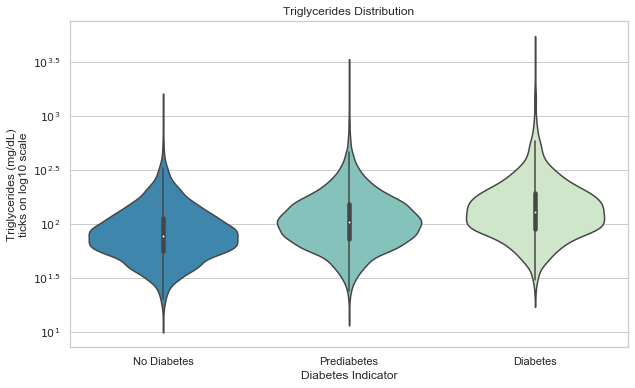

In [42]:
# Seaborn doesn't handle this data well with set_yscale('log'). Take log of data and plot it for better results. 
plt.figure(figsize=(10, 6))
plt.rcParams['axes.formatter.use_mathtext'] = True
sns.set(style="whitegrid")
labs['LogLBXTR'] = np.log10(labs['LBXTR'])
ax = sns.violinplot(x='DIAB', y='LogLBXTR', data=labs, palette='GnBu_r')
ax.set_xticklabels(['No Diabetes','Prediabetes','Diabetes'])
ax.set_yticklabels([0, r'$10^1$', r'$10^{1.5}$', r'$10^2$', r'$10^{2.5}$', r'$10^3$', r'$10^{3.5}$'])
ax.set_xlabel('Diabetes Indicator')
ax.set_ylabel('Triglycerides (mg/dL)\nticks on log10 scale')
ax.set_title('Triglycerides Distribution')
plt.show()

### How does Aspartate Transaminase (AST) vary across the three groups?

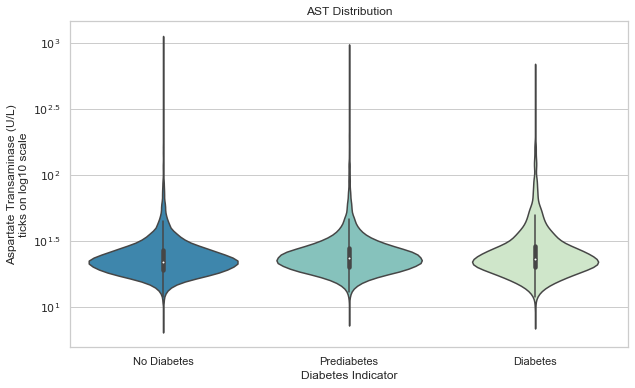

In [43]:
# Seaborn doesn't handle this data well with set_yscale('log'). Take log of data and plot it for better results.
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
labs['LogLBXSASSI'] = np.log10(labs['LBXSASSI'])
ax = sns.violinplot(x='DIAB', y='LogLBXSASSI', data=labs, palette='GnBu_r')
ax.set_xticklabels(['No Diabetes','Prediabetes','Diabetes'])
ax.set_yticklabels([0, r'$10^1$', r'$10^{1.5}$', r'$10^2$', r'$10^{2.5}$', r'$10^3$'])
ax.set_xlabel('Diabetes Indicator')
ax.set_ylabel('Aspartate Transaminase (U/L)\nticks on log10 scale')
ax.set_title('AST Distribution')
plt.show()

### How does Alanine Transaminase (ALT) vary across the three groups?

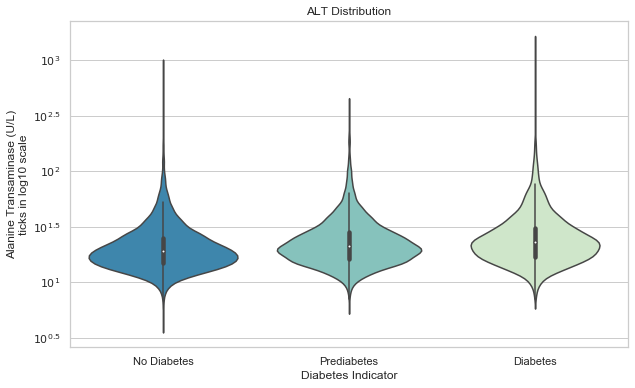

In [44]:
# Seaborn doesn't handle this data well with set_yscale('log'). Take log of data and plot it for better results.
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
labs['LogLBXSATSI'] = np.log10(labs['LBXSATSI'])
ax = sns.violinplot(x='DIAB', y='LogLBXSATSI', data=labs, palette='GnBu_r')
ax.set_xticklabels(['No Diabetes','Prediabetes','Diabetes'])
ax.set_yticklabels([0, r'$10^{0.5}$', r'$10^1$', r'$10^{1.5}$', r'$10^2$', r'$10^{2.5}$', r'$10^3$'])
ax.set_xlabel('Diabetes Indicator')
ax.set_ylabel('Alanine Transaminase (U/L)\nticks in log10 scale')
ax.set_title('ALT Distribution')
plt.show()

### How does Gamma-glutamyl transferase (GGT) vary across the three groups?

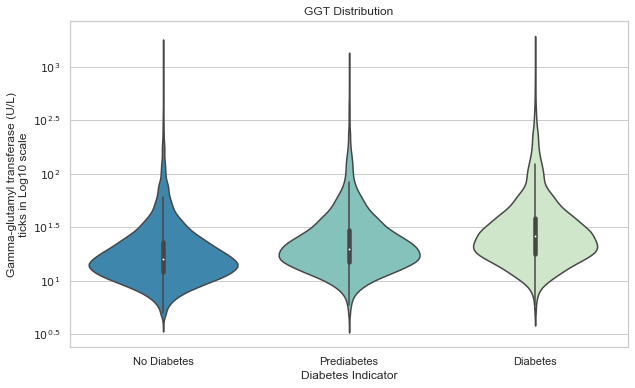

In [45]:
# Seaborn doesn't handle this data well with set_yscale('log'). Take log of data and plot it for better results.
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
labs['LogLBXSGTSI'] = np.log10(labs['LBXSGTSI'])
ax = sns.violinplot(x='DIAB', y='LogLBXSGTSI', data=labs, palette='GnBu_r')
ax.set_xticklabels(['No Diabetes','Prediabetes','Diabetes'])
ax.set_yticklabels([0, r'$10^{0.5}$', r'$10^1$', r'$10^{1.5}$', r'$10^2$', r'$10^{2.5}$', r'$10^3$'])
ax.set_xlabel('Diabetes Indicator')
ax.set_ylabel('Gamma-glutamyl transferase (U/L)\nticks in Log10 scale')
ax.set_title('GGT Distribution')
plt.show()

### How does Uric Acid vary across the three groups?

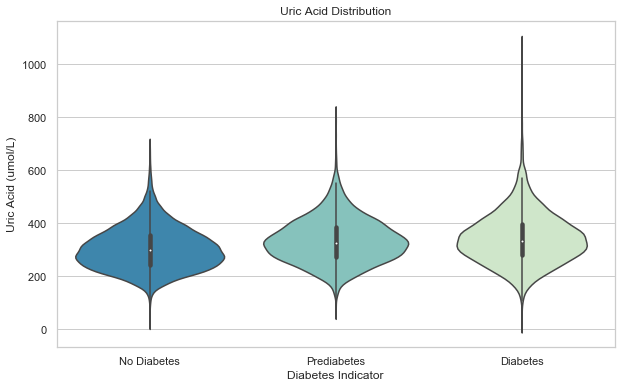

In [46]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.violinplot(x='DIAB', y='LBDSUASI', data=labs, palette='GnBu_r')
ax.set_xticklabels(['No Diabetes','Prediabetes','Diabetes'])
ax.set_xlabel('Diabetes Indicator')
ax.set_ylabel('Uric Acid (umol/L)')
ax.set_title('Uric Acid Distribution')
plt.show()

### How does Hemoglobin vary across the three groups?

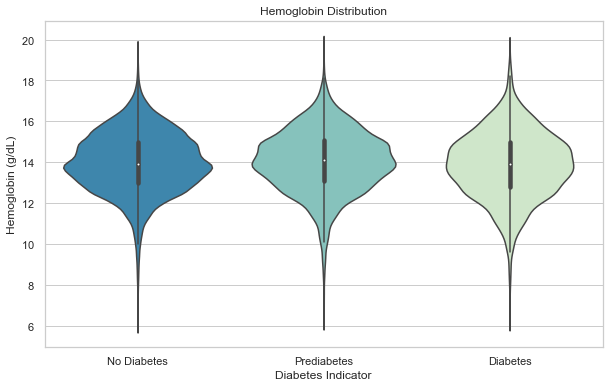

In [47]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.violinplot(x='DIAB', y='LBXHGB', data=labs, palette='GnBu_r')
ax.set_xticklabels(['No Diabetes','Prediabetes','Diabetes'])
ax.set_xlabel('Diabetes Indicator')
ax.set_ylabel('Hemoglobin (g/dL)')
ax.set_title('Hemoglobin Distribution')
plt.show()

### How does Body Mass Index (BMI) vary across the three groups?

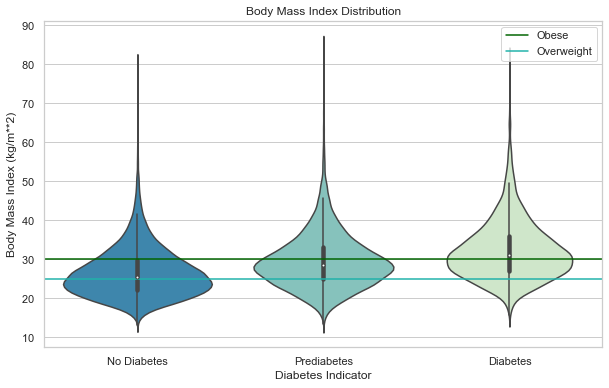

In [48]:
exam_diab = labs.merge(exam, on='SEQN')
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.violinplot(x='DIAB', y='BMXBMI', data=exam_diab, palette='GnBu_r')
ax.axhline(y=30, c='darkgreen', label='Obese')
ax.axhline(y=25, c='lightseagreen', label='Overweight')
ax.set_xticklabels(['No Diabetes','Prediabetes','Diabetes'])
ax.set_xlabel('Diabetes Indicator')
ax.set_ylabel('Body Mass Index (kg/m**2)')
ax.set_title('Body Mass Index Distribution')
plt.legend()
plt.show()

### How does Systolic Blood Pressure vary across the three groups?
#### Use mean of four readings taken.

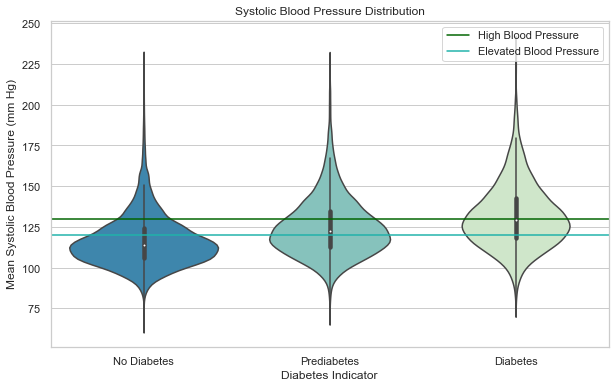

In [49]:
exam_diab = exam_diab.assign(BPXSYM = exam_diab[['BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXSY4']].mean(axis=1))
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.violinplot(x='DIAB', y='BPXSYM', data=exam_diab, palette='GnBu_r')
ax.set_xticklabels(['No Diabetes','Prediabetes','Diabetes'])
ax.axhline(y=130, c='darkgreen', label='High Blood Pressure')
ax.axhline(y=120, c='lightseagreen', label='Elevated Blood Pressure')
ax.set_xlabel('Diabetes Indicator')
ax.set_ylabel('Mean Systolic Blood Pressure (mm Hg)')
ax.set_title('Systolic Blood Pressure Distribution')
plt.legend()
plt.show()